# Recherche des lemmes dans les réponses

 ## Illustration de l'analyse Boolénne du grand débat national 

## Importation des librairies 

In [25]:
# coding: utf-8
import gensim
import smart_open
import numpy as np
import string
import pandas as pd

### Choix du domaine et téléchargement du fichier csv

De la ligne 1 à 9 on choisi l'un des quatre domaines:

ORGANISATION_DE_LETAT_ET_DES_SERVICES_PUBLICS,   
LA_TRANSITION_ECOLOGIQUE,    
DEMOCRATIE_ET_CITOYENNETE,   
LA_FISCALITE_ET_LES_DEPENSES_PUBLIQUES.

De la ligne 10 à 14 on télécharge le fichier csv du domaine

In [26]:
domaine=input("repertoire? orga, transition, fiscal, ou demo : ")
dicodom={}
dicodom["orga"]="ORGANISATION_DE_LETAT_ET_DES_SERVICES_PUBLICS"
dicodom["transition"]="LA_TRANSITION_ECOLOGIQUE"
dicodom["demo"]="DEMOCRATIE_ET_CITOYENNETE"
dicodom["fiscal"]="LA_FISCALITE_ET_LES_DEPENSES_PUBLIQUES"
ficr="http://opendata.auth-6f31f706db6f4a24b55f42a6a79c5086.storage.sbg5.cloud.ovh.net/2019-03-21/"
ficr+=dicodom[domaine]+".csv"
fichier_csv=dicodom[domaine]+".csv"
ficsor="cherche"
ficanal=open(ficsor,"w")
ficanal.write(ficr)
ficanal.close()
!wget -i cherche
#print("Le temps de chargement peut être long")
data = pd.read_csv(fichier_csv, low_memory=False) # le fichier complet du domaine

repertoire? orga, transition, fiscal, ou demo : orga
--2019-08-20 17:00:02--  http://opendata.auth-6f31f706db6f4a24b55f42a6a79c5086.storage.sbg5.cloud.ovh.net/2019-03-21/ORGANISATION_DE_LETAT_ET_DES_SERVICES_PUBLICS.csv
Résolution de opendata.auth-6f31f706db6f4a24b55f42a6a79c5086.storage.sbg5.cloud.ovh.net (opendata.auth-6f31f706db6f4a24b55f42a6a79c5086.storage.sbg5.cloud.ovh.net)… 164.132.114.175
Connexion à opendata.auth-6f31f706db6f4a24b55f42a6a79c5086.storage.sbg5.cloud.ovh.net (opendata.auth-6f31f706db6f4a24b55f42a6a79c5086.storage.sbg5.cloud.ovh.net)|164.132.114.175|:80… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 218835248 (209M) [text/csv]
Enregistre : «ORGANISATION_DE_LETAT_ET_DES_SERVICES_PUBLICS.csv.1»

ORGANISATION_DE_LET 100%[===================>] 208,70M  41,8MB/s    ds 5,8s    

2019-08-20 17:00:08 (36,2 MB/s) - «ORGANISATION_DE_LETAT_ET_DES_SERVICES_PUBLICS.csv.1» enregistré [218835248/218835248]

Terminé — 2019-08-20 17:00:08 —
Temps tot

## Choix de la question

On lit la liste des question en décommentant la deuxième ligne.

Pour d'obscures raisons les numéros des questions partent de 11
pour la première, puis 12 pour la seconde etc.

Les lignes 7 à 11 permettent de choisir la question avec la possibilité d'annuler ce choix 
en cas d'erreur sur le numéro de la question en ne répondant pas oui à la question
"c'est bien la question qui vous intéresse ?"

Puis on met en forme la liste des réponses à la question choisie.

In [27]:
q=data[0:0] # la ligne des questions
print(q) # décommentez pour avoir la liste des questions
# attention, pour d'obscures raisons les numéros des questions partent de 11
#pour la première, puis 12 pour la seconde etc.
liste=[] #initialise la liste des réponses
n=0 # compter les réponses non vides
ok="non"
while ok!="oui":
    nquestion=int(input("numero de la question"))
    print(data.columns[nquestion])
    ok=input("c'est bien la question qui vous intéresse ? (oui/non)")
for line in data[data.columns[nquestion]]:
    liste.append(line)
print("nombre total de répondants = ",len(liste))
long=len(liste)
question=[]
for i in q: 
    question.append(i)    
print("domaine", dicodom[domaine],"question  ",question[nquestion],len(liste),nquestion) 


Empty DataFrame
Columns: [id, reference, title, createdAt, publishedAt, updatedAt, trashed, trashedStatus, authorId, authorType, authorZipCode, Q169 - Que pensez-vous de l'organisation de l'Etat et des administrations en France ? De quelle manière cette organisation devrait-elle évoluer ?, Q170 - Selon vous, l'Etat doit-il aujourd'hui transférer de nouvelles missions aux collectivités territoriales ?, Q171 - Si oui, lesquelles ?, Q204 - Estimez-vous avoir accès aux services publics dont vous avez besoin ?, Q172 - Si non, quels types de services publics vous manquent dans votre territoire et qu'il est nécessaire de renforcer ?, Q174 - Quels nouveaux services ou quelles démarches souhaitez-vous voir développées sur Internet en priorité ?, Q175 - Avez-vous déjà utilisé certaines de ces nouvelles formes de services publics ?, Q176 - Si oui, en avez-vous été satisfait ?, Q177 - Quelles améliorations préconiseriez-vous ?, Q178 - Quand vous pensez à l'évolution des services publics au cours d

### Préparation de la liste des réponses

In [30]:
ficsor="regard"
ficanal=open(ficsor,"w")
fcw=ficanal.write # abbréviation
fcw(dicodom[domaine]+"\n")
for i in range(1,long):
    if str(liste[i]) !="nan":
        fcw(str(liste[i])) # le fichier de sortie regard est
        fcw("\n")          # la liste des réponses
        n+=1
print("nb de réponses non vides",n)
ficanal.close()

nb de réponses non vides 74962


## Préfiltrage du fichier des réponses
  On définit la fonction read_corpus qui lit chaque réponse (donc ligne par ligne) en isolant les mots, et supprime la ponctuation, change les majuscules en minuscules etc. puis on l'applique au fichier des réponses.
  On obtient ainsi l'ensemble des réponses filtrées rep_fil.

In [31]:
def read_corpus(fname, tokens_only=False):
    with smart_open.smart_open(fname, encoding="utf-8") as f:
        for i, line in enumerate(f):
            if tokens_only:
                yield gensim.utils.simple_preprocess(line)
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(line), [i])

rep_fil = list(read_corpus('regard', tokens_only=True))
print(len(rep_fil))

83465


## Lecture d'une partie des réponses pour choisir les lemmes

In [34]:
N=input("nombre de réponses à lire :  " )
for i in range(25,int(N)):
        if str(liste[i]) !="nan":
            print(liste[i],"\n")            

nombre de réponses à lire :  50
Proposition de Refondation du Capitalisme et d'Instauration d'un Dividende Universel Financées par l'Épargne.

En démocratie, le peuple souverain élit les représentants, compétents ou incompétents, qu’il mérite du fait de sa propre compétence ou incompétence.
Sans les nommer, Macron a expliqué que les « gilets jaunes » qui, au départ, ne réclamaient que du pouvoir d’achat, se sont révoltés, entre autres, contre une « Mondialisation parfois incompréhensible » quand bien même ils ne le percevaient pas ainsi.
En réalité, Macron et les « gilets jaunes » se réfèrent, sans le savoir, à l’iniquité intrinsèque du Capitalisme en matière de répartition des richesses, des profits. Quelle incompétente incompréhension ! ! !
Tant que cette iniquité ne disparaîtra pas, il demeurera vain d’espérer une réelle croissance du pouvoir d’achat sauf à se livrer à des dépenses de plusieurs dizaines (?) de milliards d’Euros alourdissant la dette.
Nombre de personnes croient que 

## C'est à vous d'établir ici la liste des lemmes à tester à partir de la lecture d'une centaine de réponses.  

liste_lemme est une liste de listes. Chaque lemme est une liste de mots équivalents. Attention à la syntaxe!

In [35]:
liste_lemme=[]
lla=liste_lemme.append # abbréviation
#lla(['service','engagement','écoute']) 
#lla(['référendum','RIC','vote','votes']) 
#lla(['instruction','éducation','éducations','civique','économie','contribution','association','peuple','citoyen']) 
lla(['suppression','moins','mille-feuille','trop','baisser','réduire'])
lla(['sénat','Sénat','sénateurs'])
lla(['informatique','éducation','digital','école'])

## L'analyse démarre ici.

Les compteurs:

ccompte: les réponses contenant au moins un lemme.

c nombre de réponses contenant l'un des lemmes de 0 à 2

count enregistre le nb de réponses en fonction des lemmes présents codés en décimal, de 0 à 7.


Un code décimal est utilisé pour  l'indice j du vecteur count qui enregistre le nombre des réponses en fonction des lemmes présents. 
 
 On code en décimal la présence (par le bit 1) ou l'absence (par le bit 0) de mots ou leurs équivalents (lemmes) dans une réponse. Le bit de gauche (MSB) code la présence du premier lemme, celui du milieu celle second et le troisième (LSB) celle du troisième lemme.
 
| code binaire | 000 | 001 | 010 | 011 | 100 | 101 | 110 | 111 |
|--------------|-----|-----|-----|-----|-----|-----|-----|-----| 
| code décimal |  0  |  1  |  2  |  3  |  4  |  5  |  6  |  7  | 

  Le code binaire 010 par exemple indique l'absence des lemmes n°1 et n°3 et la présence du lemme n°2
  
  Les labels sont les représentants du lemme (le premier mot).
 

In [36]:
c=[]
for i in range(3):
    c.append(0)
z=0 #z est la représentation décimale
count=np.zeros(50,'int32')
for i in range(len(rep_fil)):
    z=0
    mul=1
    k=-1
    for lem in liste_lemme:
        mul*=2
        k+=1
        for mot in lem:
            if mot in rep_fil[i]:
                z+=mul
                c[k]+=1
                break  
    zz=z//2
    count[zz]+=1
# la boucle de comptage finit ici

ccompte=0  # les réponses contenant au moins un lemme
print("non reconnus ", end =" ")
liste=[]  
labels=[]  # le premier mot du lemme servant de représentant
for i in range(3):
    labels.append(liste_lemme[i][0])
for j in range(8):    
    ccompte+=count[j+1] # total des réponses captatrices
    liste.append(count[j+1])
#   les if qui suivent correspondent à des OU 
    if j%2==1:
        print(liste_lemme[0][0],end =" ")
    if j&2 > 0:
        print(liste_lemme[1][0],end =" ")
    if j&4 > 0:
        print(liste_lemme[2][0],end =" ")
#    if j&8:
#        print(liste_lemme[3][0],end =" ")
    print(count[j],'\n')
print ('réponses reconnues',ccompte)
for i in range(3):
    print(liste_lemme[i][0],c[i],end =" ")
print(" ")  
for i in range(3):
    print(liste_lemme[i][0],"{0:.1f}".format(100*c[i]/ccompte),'%',end =" ")
    
    

non reconnus  60385 

suppression 18672 

sénat 1337 

suppression sénat 1240 

informatique 1365 

suppression informatique 433 

sénat informatique 15 

suppression sénat informatique 18 

réponses reconnues 23080
suppression 20363 sénat 2610 informatique 1831  
suppression 88.2 % sénat 11.3 % informatique 7.9 % 

# Tracé du diagramme de Venn
Le diagramme de Venn est la représentation graphique de ces résultats.
La surface de chaque portion de cercle est proportionnelle au nombre de
réponses  mentionnant les lemmes. Les trois cercles complets de couleur brique,
verte et bleue  correspondent respectivement aux lemmes service, référendum et instruction.
Les intersections aux couleurs composites correspondent aux réponses mixtes mentionnant deux ou trois lemmes. Les chiffres sont les nombres de réponses
correspondantes.

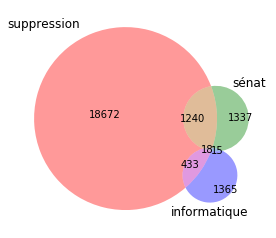

In [37]:
% matplotlib inline
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
# Makes the diagram
venn3(subsets =liste,set_labels=labels)
#plt.savefig('nom_de_figure.pdf') # choisissez ici le fichier de sauvegarde de la figure
plt.show()